In [1]:
import numpy as np
import os
from scipy import optimize
import matplotlib.pyplot as plt
import scipy.io
import os

# K-Means algorithm

In [2]:
#convert image to matrix of pixels
import skimage.io

In [3]:
os.listdir('Data/')

['bird_small.mat',
 'bird_small.png',
 'ex7data1.mat',
 'ex7data2.mat',
 'ex7faces.mat']

In [4]:
data2 = scipy.io.loadmat('Data/ex7data2')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
X = data2['X']
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

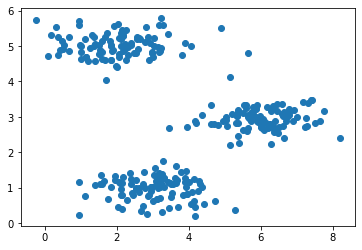

In [6]:
plt.plot(X[:,0], X[:,1], 'o')

In [7]:
m, n = X.shape
print(f'number of examples m = {m}, number of features n = {n}')

number of examples m = 300, number of features n = 2


### "Paint" each example with K colors (assign index)

In [8]:
def findClosestCentroids(X, mu, K):
    '''
    X it's a matrix of m x n, examples.
    mu it's a matrix of K x n, centroids.
    K the number of clusters that we want to get
    '''
    id_x = np.zeros(m)
    for i in range(m):
        distance = np.linalg.norm(X[i,:] - mu, axis=1)
        id_x[i] = np.argmin(distance)     
    return id_x

In [9]:
K = 3
mu = np.array([[3, 3], [6, 2], [8, 5]])

### Compute centroids of each centroid

In [10]:
def computeCentroids(X, id_x, K):
    m,n = X.shape
    mu = np.zeros([K, n])
    for k in range(K):
        mu[k,:] = np.mean(X[id_x == k,:],axis=0)
    return mu     

In [11]:
id_x = findClosestCentroids(X, mu, K)
mu = computeCentroids(X, id_x, K)
mu

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [12]:
def kMeans(X, initial_centroids, K, iterations):
    centroids = initial_centroids #kMeansInitCentroids(X, K)
    #historical_centroids = np.zeros([K,n,iterations])
    for it in range(iterations):
        #Cluster assignment step: Assign each data point to the closest centroid. 
        #idx(i) corresponds to cˆ(i), the index of the centroid assigned to example i
        id_x = findClosestCentroids(X, centroids, K)
        #Move centroid step: Compute means based on centroid assignments
        centroids = computeCentroids(X, id_x, K)
        #historical_centroids[:,:,K] = centroids
    return centroids, id_x #, historical_centroids

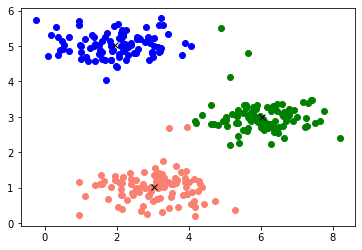

In [13]:
iterations = 10
initial_centroids =  np.array([[3, 3], [6, 2], [8, 5]]) #np.array([[3, 1], [7, 3], [1, 5]]) #np.array([[3, 3], [6, 2], [8, 5]])
centroids, id_x = kMeans(X, initial_centroids, K, iterations)
id_0 = id_x == 0
id_1 = id_x == 1
id_2 = id_x == 2
plt.plot(X[id_0,0],X[id_0,1], 'o', color = 'blue')
plt.plot(X[id_1,0],X[id_1,1], 'o', color = 'salmon')
plt.plot(X[id_2,0],X[id_2,1], 'o', color = 'green')
plt.plot(centroids[:,0],centroids[:,1], 'x', color='black')

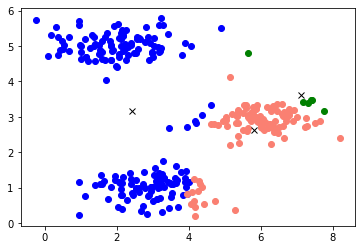

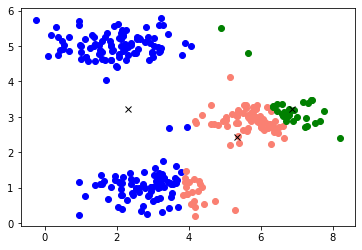

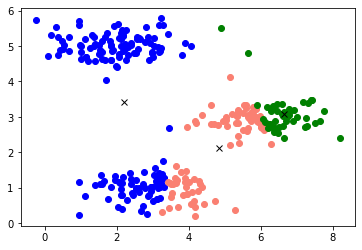

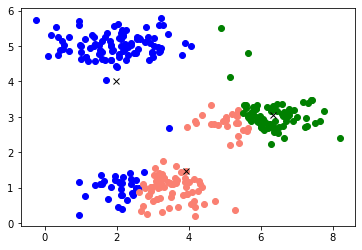

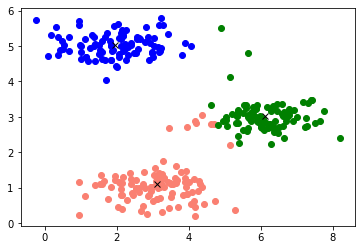

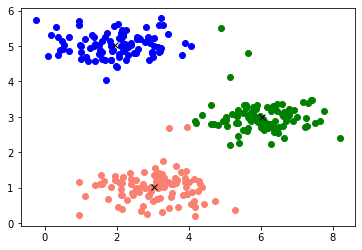

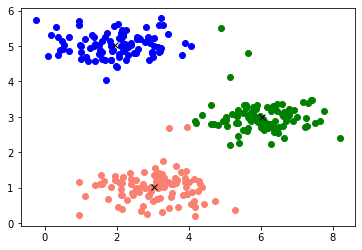

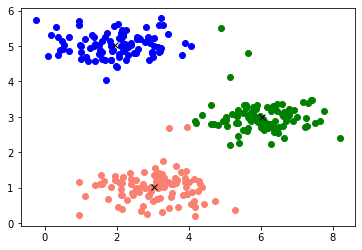

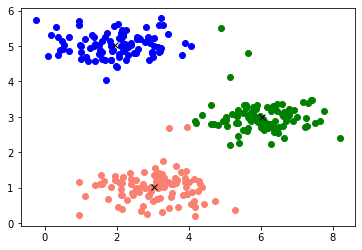

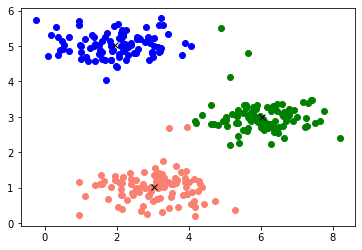

In [14]:
centroids = initial_centroids #kMeansInitCentroids(X, K)
for it in range(iterations):
    #Cluster assignment step: Assign each data point to the closest centroid. 
    #idx(i) corresponds to cˆ(i), the index of the centroid assigned to example i
    id_x = findClosestCentroids(X, centroids, K)
    #Move centroid step: Compute means based on centroid assignments
    centroids = computeCentroids(X, id_x, K)
    id_0 = id_x == 0
    id_1 = id_x == 1
    id_2 = id_x == 2
    plt.plot(X[id_0,0],X[id_0,1], 'o', color = 'blue')
    plt.plot(X[id_1,0],X[id_1,1], 'o', color = 'salmon')
    plt.plot(X[id_2,0],X[id_2,1], 'o', color = 'green')
    plt.plot(centroids[:,0],centroids[:,1], 'x', color='black')
    plt.show()

### Random Initilization

In [15]:
def kMeansInitCentroids(X,K):
    m = X.shape[0]
    randidx = np.random.permutation(m)
    initial_centroids = X[randidx[0:K],:]
    return initial_centroids

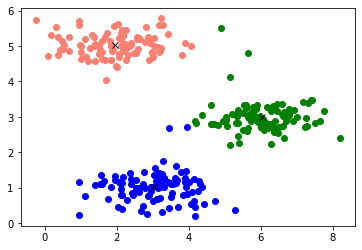

In [16]:
iterations = 10
initial_centroids = kMeansInitCentroids(X,K)
centroids, id_x = kMeans(X, initial_centroids, K, iterations)
id_0 = id_x == 0
id_1 = id_x == 1
id_2 = id_x == 2
plt.plot(X[id_0,0],X[id_0,1], 'o', color = 'blue')
plt.plot(X[id_1,0],X[id_1,1], 'o', color = 'salmon')
plt.plot(X[id_2,0],X[id_2,1], 'o', color = 'green')
plt.plot(centroids[:,0],centroids[:,1], 'x', color='black')

### K-means on pixels

In [17]:
# using preload matrix of pixels
# bird = scipy.io.loadmat('Data/bird_small.mat')
# A = bird['A']

#skimage.io.imread('Data/bird_small.png')
A = plt.imread('Data/bird_small.png', format='uint8')
A #the last component indicates the color pixels, A[:,:,0] Red, A[:,:,1] Green and A[:,:,2] Blue (RGB) 

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

In [18]:
I = np.stack((A[:,:,0].flatten(), A[:,:,1].flatten(), A[:,:,2].flatten()), axis=0).T
I.shape

(16384, 3)

In [19]:
m,n = I.shape
K = 16

In [20]:
iterations = 10
initial_centroids = kMeansInitCentroids(I, K)
centroids, id_I = kMeans(I, initial_centroids, K, iterations)
id_I.shape

(16384,)

In [21]:
id_I

array([10., 10., 10., ...,  8.,  8.,  8.])

In [22]:
I_recovered = centroids[id_I.astype(int),:]
I_recovered.shape

(16384, 3)

In [23]:
Image_reduced = I_recovered.reshape(A.shape)

In [24]:
Image_reduced

array([[[227.49533503, 189.98473282, 122.44359627],
        [227.49533503, 189.98473282, 122.44359627],
        [227.49533503, 189.98473282, 122.44359627],
        ...,
        [ 22.19598442,  24.00059934,  21.41774049],
        [ 22.19598442,  24.00059934,  21.41774049],
        [ 22.19598442,  24.00059934,  21.41774049]],

       [[227.49533503, 189.98473282, 122.44359627],
        [227.49533503, 189.98473282, 122.44359627],
        [227.49533503, 189.98473282, 122.44359627],
        ...,
        [ 22.19598442,  24.00059934,  21.41774049],
        [ 22.19598442,  24.00059934,  21.41774049],
        [ 22.19598442,  24.00059934,  21.41774049]],

       [[227.49533503, 189.98473282, 122.44359627],
        [227.49533503, 189.98473282, 122.44359627],
        [227.49533503, 189.98473282, 122.44359627],
        ...,
        [ 22.19598442,  24.00059934,  21.41774049],
        [ 22.19598442,  24.00059934,  21.41774049],
        [ 22.19598442,  24.00059934,  21.41774049]],

       ...,

      

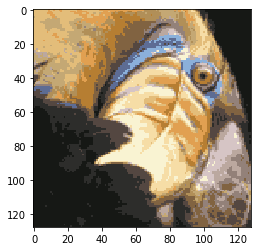

In [25]:
#plt.imshow(Image_reduced)
plt.imshow((Image_reduced).astype(np.uint8))

# Principal Component Analysis

In [26]:
data1 = scipy.io.loadmat('Data/ex7data1.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

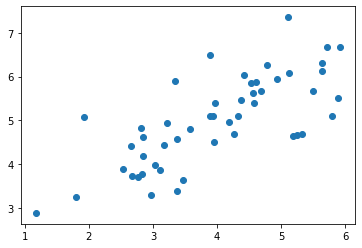

In [27]:
X=data1['X']
plt.scatter(X[:,0], X[:,1])
#plt.plot(X[:,0], X[:,1],  marker='o')

In [28]:
m,n = X.shape
print(f'number of examples m ={m}, number of features n = {n}')

number of examples m =50, number of features n = 2


In [29]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0) 
    X_normalized = (X - mu)/sigma
    return X_normalized

In [30]:
X_normalized = featureNormalize(X)
X_normalized

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,

In [31]:
def PCA(X):
    m = X.shape[0]
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    covariance_matrix = (X_normalized.T @ X_normalized) / m
    U, S, V = np.linalg.svd(covariance_matrix)
    return U, S, V

In [32]:
U, S, V = PCA(X)
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [33]:
def projectData(X, U, K):
    #We should use X normalized instead of X without feature normalization
    U_k = U[:,:K]
    projection = X @ U_k #50x1
    return projection

In [34]:
Z = projectData(X_normalized, U, 1) #X
Z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

In [35]:
def recoverData(Z, U, K):
    U_k = U[:,:K] # (n, K)
    X_recovered = Z @ U_k.T #(m, K) * (K, n) = (m,n)
    return X_recovered

In [36]:
X_recovered = recoverData(Z, U, 1)
X_recovered[0,:]

array([-1.05805279, -1.05805279])

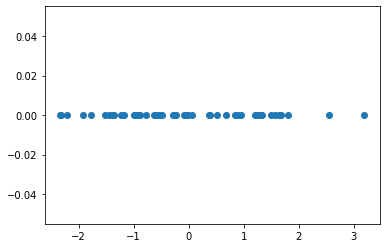

In [37]:
plt.plot(Z, np.zeros([m,1]), 'o')

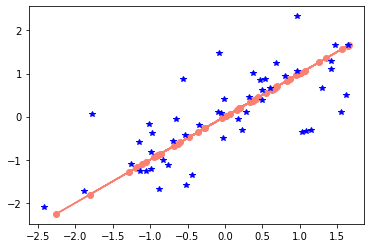

In [38]:
plt.plot(X_recovered[:,0], X_recovered[:,1], color = 'salmon', marker = 'o')
plt.plot(X_normalized[:,0], X_normalized[:,1], '*', color = 'blue')

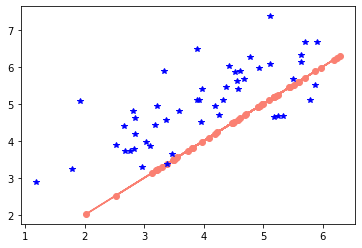

In [39]:
plt.plot(recoverData(projectData(X, U, 1), U, 1)[:,0], recoverData(projectData(X, U, 1), U, 1)[:,1], color = 'salmon', marker = 'o')
plt.plot(X[:,0], X[:,1], '*', color = 'blue')
#We see the importance to normalize!

### Face Image Dataset

In [40]:
face = scipy.io.loadmat('Data/ex7faces.mat')
X = face['X']
X.shape

(5000, 1024)

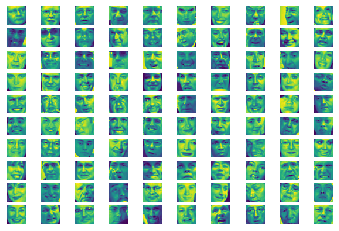

In [41]:
fig, axs = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        k += 1
        axs[i,j].imshow(X[k,:].reshape(32,32).T) #32x32 = 1024  
        axs[i,j].axis('off')

In [42]:
U, S, V = PCA(X)

In [43]:
K = 36
X_normalized = featureNormalize(X)
Z = projectData(X_normalized, U, K)
X_recovered = recoverData(Z, U, K)
X_recovered.shape

(5000, 1024)

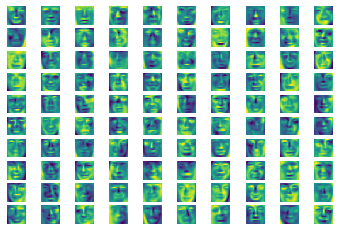

In [44]:
fig, axs = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        k += 1
        axs[i,j].imshow(X_recovered[k,:].reshape(32,32).T) #32x32 = 1024  
        axs[i,j].axis('off')

(-0.5, 31.5, 31.5, -0.5)

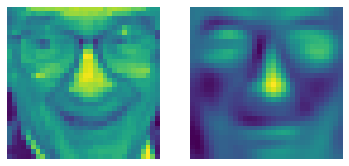

In [45]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X[0,:].reshape(32,32).T) 
axs[0].axis('off')
axs[1].imshow(X_recovered[0,:].reshape(32,32).T) 
axs[1].axis('off')

### PCA for visualization

In [46]:
from mpl_toolkits.mplot3d import Axes3D  

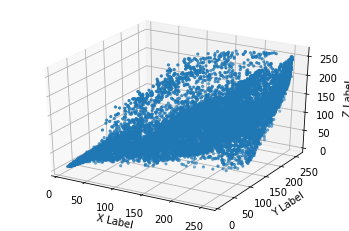

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(I[:,0], I[:,1], I[:,2], marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

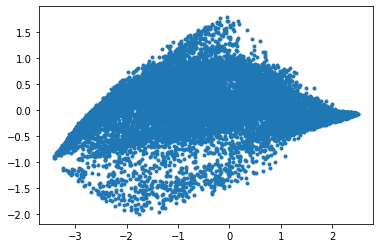

In [48]:
U, S, V = PCA(I)
I_normalize = featureNormalize(I)
I_projected = projectData(I_normalize, U, 2)
plt.scatter(I_projected[:,0], I_projected[:,1], marker='.')